# Classification Project for Travel Insurance Company

## Company Background

Travel Assured is a travel insurance company.

Travel Assured has plenty of data on their current customers as well as people who got
quotes but never bought insurance

## Summary

The objective is to predict whether a customer will have conflicting classifications. This is presented here as a binary classification problem, where each record in the dataset is a customer.

Conflicting classification has been assigned to the TravelInsurance column. It is a binary representation of whether or not a customer has conflicting classifications, where **0** represents **No travel insurance** and **1** represents **Travel Insurance**.

In this project, we will employ different classifier models to find the best candidate algorithm that accurately predicts whether a customer buys travel insurance or not.

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from math import sqrt

#### Initial look of the dataset

In [2]:
file = pd.read_csv('travel_insurance.csv')

In [3]:
file.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Featureset Exploration


**Age**: Numeric, the customer’s age

**Employment Type**: Character, the sector of employment

**GraduateOrNot**: Character, whether the customer is a college graduate

**AnnualIncome**: Numeric, the customer’s yearly income

**FamilyMembers**: Numeric, the number of family members living with the
customer

**ChronicDiseases**: Numeric, whether the customer has any chronic conditions

**FrequentFlyer**: Character, whether a customer books frequent tickets

**EverTravelledAbroad**: Character, has the customer ever travelled abroad

**TravelInsurance**: Numeric, whether the customer bought travel insurance


In [4]:
file.dtypes

Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

In [5]:
new_file = pd.get_dummies(file, drop_first=True)

In [6]:
new_file.dtypes

Age                                             int64
AnnualIncome                                    int64
FamilyMembers                                   int64
ChronicDiseases                                 int64
TravelInsurance                                 int64
Employment Type_Private Sector/Self Employed    uint8
GraduateOrNot_Yes                               uint8
FrequentFlyer_Yes                               uint8
EverTravelledAbroad_Yes                         uint8
dtype: object

In [7]:
print(file.shape)
print(new_file.shape)

(1987, 9)
(1987, 9)


In [8]:
new_file.isnull().sum()

Age                                             0
AnnualIncome                                    0
FamilyMembers                                   0
ChronicDiseases                                 0
TravelInsurance                                 0
Employment Type_Private Sector/Self Employed    0
GraduateOrNot_Yes                               0
FrequentFlyer_Yes                               0
EverTravelledAbroad_Yes                         0
dtype: int64

# Defining X and Y variables

In [9]:
X = new_file.drop('TravelInsurance', axis=1).values
y = new_file['TravelInsurance']

print(X.shape)
print(y.shape)

(1987, 8)
(1987,)


In [10]:
file['TravelInsurance'].value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

# Applying Feature scaling

In [11]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler

In [12]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

In [13]:
# Scaling the raw input features
X = scaler.fit_transform(X)

In [14]:
print(f"The range of feature inputs are within {X.min()} to {X.max()}")

The range of feature inputs are within 0.0 to 1.0000000000000002


In [15]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1277,  710], dtype=int64))

In [16]:
rs = 10222

# Train / Test Split

In [17]:
# First, let's split the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

# Train models

- Standard logistic regression, K-nearest neighbors algorithm, Decision Tree,mRandom Forest
- Plot the results using heatmaps
- Compare scores: precision, recall, accuracy, F1 score, auc

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegressionCV

In [19]:
# create dataframe for metrics
metricss = pd.DataFrame()

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

precision_lr, recall_lr = (round(float(x),2) for x in list(score(y_test,
                                                                    y_pred_lr,
                                                                    average='weighted'))[:-2])
# adding lr stats to metrics DataFrame
lr_stats = pd.Series({'precision':precision_lr,
                      'recall':recall_lr,
                      'accuracy':round(accuracy_score(y_test, y_pred_lr), 2),
                      'f1score':round(f1_score(y_test, y_pred_lr), 2),
                      'auc': round(roc_auc_score(y_test, y_pred_lr),2)},
                     name='Logistic Regression')
# Report outcomes
pd.DataFrame(classification_report(y_test, y_pred_lr, output_dict=True)).iloc[:3,:2]

,0,1
precision,0.783871,0.852273
recall,0.949219,0.528169
f1-score,0.858657,0.652174


## K-nearest Neighbors

In [20]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

precision_knn, recall_knn = (round(float(x),2) for x in list(score(y_test,
                                                                      y_pred_knn,
                                                                      average='weighted'))[:-2])
# adding KNN stats to metrics DataFrame
knn_stats = pd.Series({'precision':precision_knn,
                      'recall':recall_knn,
                      'accuracy':round(accuracy_score(y_test, y_pred_knn), 2),
                      'f1score':round(f1_score(y_test, y_pred_knn), 2),
                      'auc': round(roc_auc_score(y_test, y_pred_knn),2)}, name='KNN')
# Report outcomes
pd.DataFrame(classification_report(y_test, y_pred_knn, output_dict=True)).iloc[:3,:2]

,0,1
precision,0.828244,0.713235
recall,0.847656,0.683099
f1-score,0.837838,0.697842


## Decision Tree

In [21]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
dt.tree_.node_count, dt.tree_.max_depth

(899, 22)

In [22]:
y_train_pred = dt.predict(X_train)
y_pred_dt = dt.predict(X_test)

precision_dt, recall_dt = (round(float(x),2) for x in list(score(y_test,
                                                                y_pred_dt,
                                                                average='weighted'))[:-2])
# adding dt stats to metrics DataFrame
dt_stats = pd.Series({'precision':precision_dt,
                      'recall':recall_dt,
                      'accuracy':round(accuracy_score(y_test, y_pred_dt), 2),
                      'f1score':round(f1_score(y_test, y_pred_dt), 2),
                      'auc': round(roc_auc_score(y_test, y_pred_dt),2)}, name='Decision Tree')
# Report outcomes
pd.DataFrame(classification_report(y_test, y_pred_dt, output_dict=True)).iloc[:3,:2]

,0,1
precision,0.830769,0.710145
recall,0.843750,0.690141
f1-score,0.837209,0.700000


## Random forest

In [23]:
# Initialize the random forest estimator
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

# initialise list for out of bag error
oob_list = list()

# Iterate through all of the possibilities for number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)
    
    # Fit the model
    RF.fit(X_train, y_train)
    
    # Get the out of bag error and store it
    oob_error = 1 - RF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

C:\Users\RYZEN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\RYZEN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


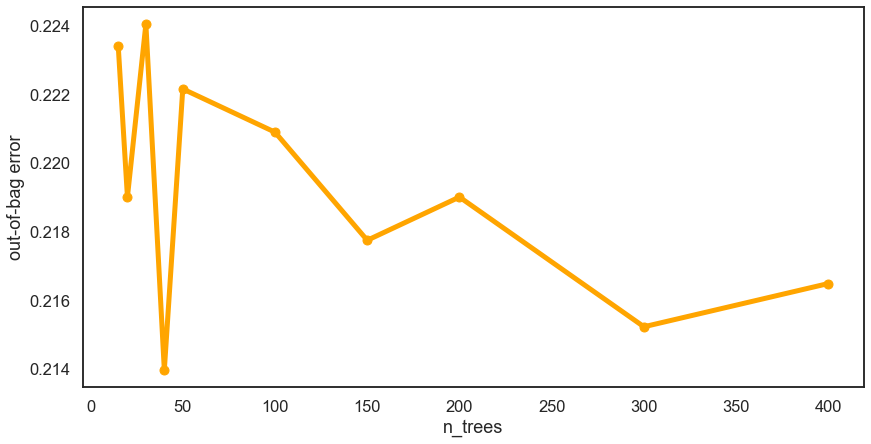

In [24]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', color="orange", figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

The error looks like it has stabilized around 300 trees.

In [25]:
rf = RF.set_params(n_estimators=300)

y_pred_rf = rf.predict(X_test)
precision_rf, recall_rf = (round(float(x),2) for x in list(score(y_test,
                                                                    y_pred_rf,
                                                                    average='weighted'))[:-2])
rf_stats = pd.Series({'precision':precision_rf,
                      'recall':recall_rf,
                      'accuracy':round(accuracy_score(y_test, y_pred_rf), 2),
                      'f1score':round(f1_score(y_test, y_pred_rf), 2),
                      'auc': round(roc_auc_score(y_test, y_pred_rf),2)}, name='Random Forest')
# Report outcomes
pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).iloc[:3,:2]

,0,1
precision,0.838235,0.777778
recall,0.890625,0.690141
f1-score,0.863636,0.731343


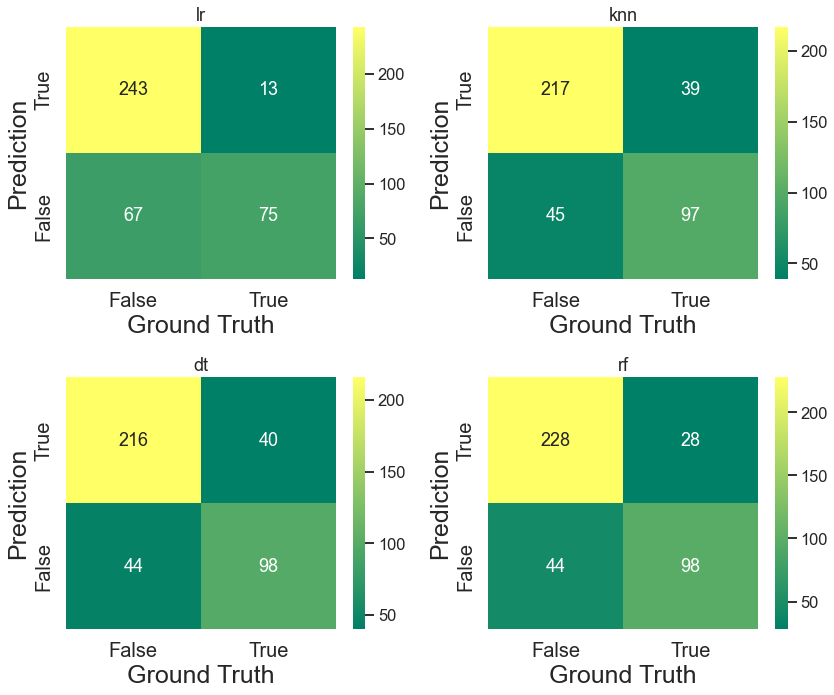

In [26]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)


models = coeff_labels = ['lr', 'knn', 'dt', 'rf']
cm = [confusion_matrix(y_test, y_pred_lr),
      confusion_matrix(y_test, y_pred_knn),
      confusion_matrix(y_test, y_pred_dt),
      confusion_matrix(y_test, y_pred_rf)]
labels = ['False', 'True']

for ax,model, idx in zip(axList, models, range(0,4)):
    sns.heatmap(cm[idx], ax=ax, annot=True, fmt='d', cmap='summer');
    ax.set(title=model);
    ax.set_xticklabels(labels, fontsize=20);
    ax.set_yticklabels(labels[::-1], fontsize=20);
    ax.set_ylabel('Prediction', fontsize=25);
    ax.set_xlabel('Ground Truth', fontsize=25)
    
plt.tight_layout()

# Final Conclusions

In [27]:
metricss.append([lr_stats, knn_stats, dt_stats, rf_stats])

C:\Users\RYZEN\AppData\Local\Temp\ipykernel_25552\936631340.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricss.append([lr_stats, knn_stats, dt_stats, rf_stats])


,precision,recall,accuracy,f1score,auc
Logistic Regression,0.81,0.80,0.80,0.65,0.74
KNN,0.79,0.79,0.79,0.70,0.77
Decision Tree,0.79,0.79,0.79,0.70,0.77
Random Forest,0.82,0.82,0.82,0.73,0.79


As we see above, the best model for us to use should be the Random Forest. Let´s quickly make a GridSearchCV to see how much we can improve our model

# Next Steps

We could further optimize these models by using **GridSearchCV** or **Boosting** algorithms.

# Random Forest with GridSearchCV

In [28]:
model = RandomForestClassifier()

In [29]:
model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [30]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"]}

In [31]:
search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy')
search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

In [32]:
search.best_score_

0.8325932980179752

In [33]:
search.best_params_

{'max_depth': 7, 'max_features': 'log2', 'n_estimators': 13}

In [34]:
from sklearn import metrics

In [35]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [36]:
print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

{'test Accuracy': 0.8542713567839196, 'train Accuracy': 0.8407803650094399}


In [37]:
y_pred_rf = search.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred_rf)

0.8542713567839196

In [39]:
confusion_matrix(y_test, y_pred_rf)

array([[250,   6],
       [ 52,  90]], dtype=int64)

Text(0.5, 4.5, 'Ground Truth')

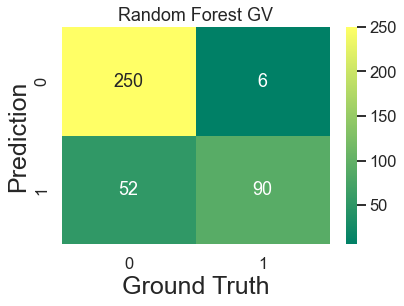

In [40]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='summer')
ax.set(title = 'Random Forest GV')
ax.set_ylabel('Prediction', fontsize=25);
ax.set_xlabel('Ground Truth', fontsize=25)

In [41]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       256
           1       0.94      0.63      0.76       142

    accuracy                           0.85       398
   macro avg       0.88      0.81      0.83       398
weighted avg       0.87      0.85      0.85       398



# Results

The classsification report of each classifier shows that I am able to predict consistent classification, with an accuracy score of 0.82 for Random Forest model. Also, we have applied a quick GridSearchCV on the best parameters for the Random Forest, which gave us an accuracy of 0.85

Additionally, you can see above the classification report and confusion matrix for that model

# Next Steps

In order to continue the investigation with the analysis, we should look deeper on some other classification techniques like L1, L2, Boosting or Stacking together with the best hyperparameters for those models, in order to make a model which interpret the best our results, and then make a nice chart in order to be presented to a company.